<ipython-input-3-f7b8e5ed2a49>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


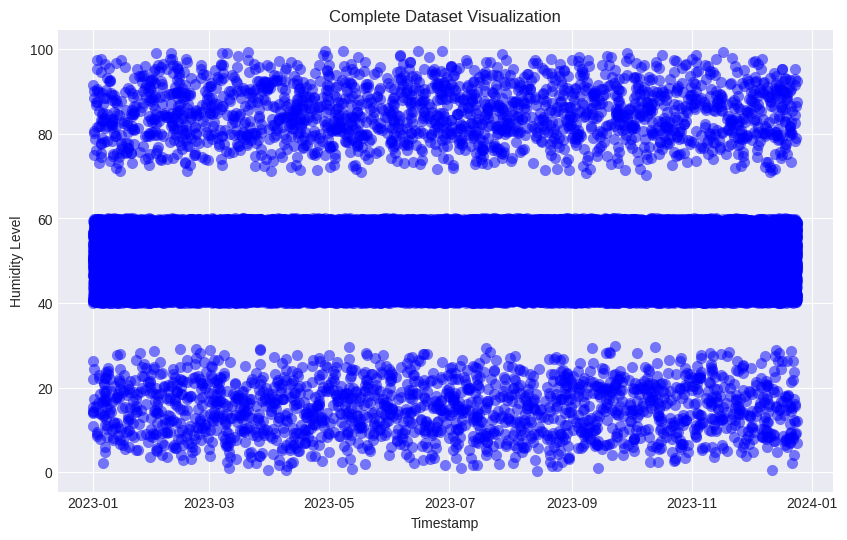

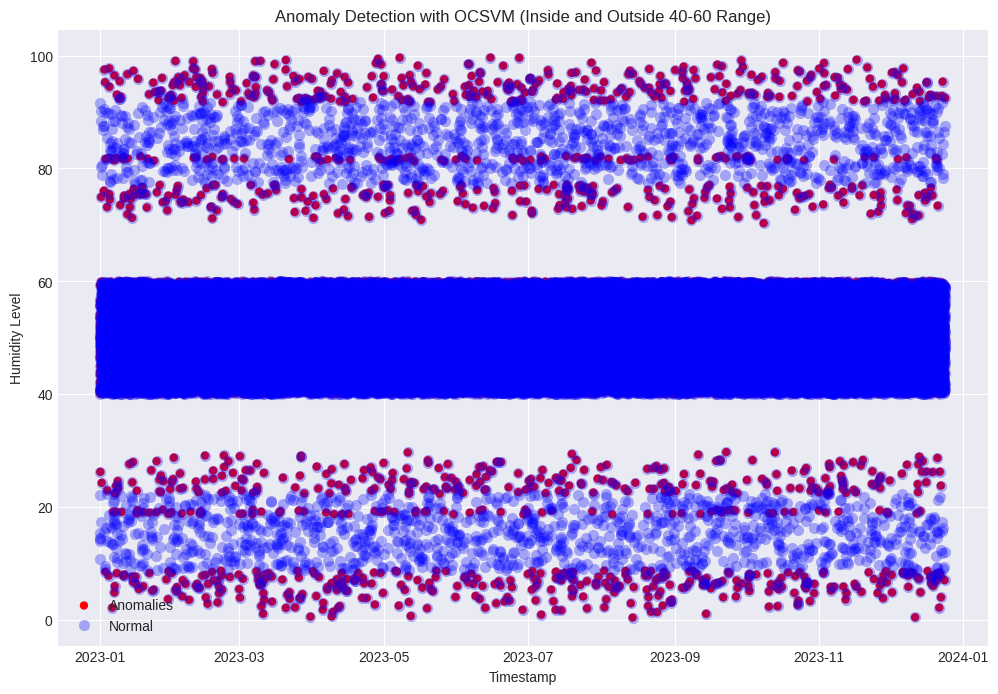

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

# Load the dataset
data = pd.read_csv('humidity_dataset.csv', parse_dates=['timestamp'])

# Sort the dataset by timestamp
data.sort_values(by='timestamp', inplace=True)

# Set the Matplotlib style
plt.style.use('seaborn-darkgrid')

# Plot the entire dataset
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['humidity'], marker='o', linestyle='', color='blue', alpha=0.5, markersize=8, markeredgecolor='none')
plt.title('Complete Dataset Visualization')
plt.xlabel('Timestamp')
plt.ylabel('Humidity Level')
plt.show()

# Prepare data for training
X_train = data[['humidity']].values

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create and train the OCSVM model
ocsvm_model = OneClassSVM(nu=0.05)  # You can adjust the 'nu' parameter based on your dataset
ocsvm_model.fit(X_train_scaled)

# Predict anomalies on the entire dataset
predictions = ocsvm_model.predict(X_train_scaled)

# Convert predictions to binary labels (0 for inliers, 1 for outliers)
binary_predictions = np.where(predictions == 1, 0, 1)

# Identify anomalies inside the range (40-60)
inside_range_mask = (X_train >= 40) & (X_train <= 60)
binary_predictions[inside_range_mask.flatten()] = 1

# Plot the dataset with anomalies highlighted
plt.figure(figsize=(12, 8))
plt.scatter(data['timestamp'][binary_predictions == 1], data['humidity'][binary_predictions == 1], color='red', marker='o', alpha=1, edgecolor='none', label='Anomalies')
plt.plot(data['timestamp'], data['humidity'], marker='o', linestyle='', color='blue', alpha=0.3, markersize=8, markeredgecolor='none', label='Normal')

plt.title('Anomaly Detection with OCSVM (Inside and Outside 40-60 Range)')
plt.xlabel('Timestamp')
plt.ylabel('Humidity Level')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the testing dataset
testing_data = pd.read_csv('training.csv', parse_dates=['timestamp'])

# Prepare data for testing
X_test = testing_data[['humidity']].values

# Standardize the testing data using the same scaler from training
X_test_scaled = scaler.transform(X_test)

# Predict anomalies on the testing dataset
test_predictions = ocsvm_model.predict(X_test_scaled)

# Convert predictions to binary labels (0 for inliers, 1 for outliers)
binary_test_predictions = np.where(test_predictions == 1, 0, 1)

# Identify anomalies inside the range (40-60)
inside_range_test_mask = (X_test >= 40) & (X_test <= 60)
binary_test_predictions[inside_range_test_mask.flatten()] = 1

# Calculate evaluation metrics
y_true = np.ones(len(X_test))  # All data in testing dataset are considered normal
accuracy = accuracy_score(y_true, binary_test_predictions)
precision = precision_score(y_true, binary_test_predictions)
recall = recall_score(y_true, binary_test_predictions)
f1 = f1_score(y_true, binary_test_predictions)

# Display the evaluation metrics
print("Testing Metrics:")
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")

Testing Metrics:
Accuracy: 0.93100
Precision: 1.00000
Recall: 0.93100
F1 Score: 0.96427


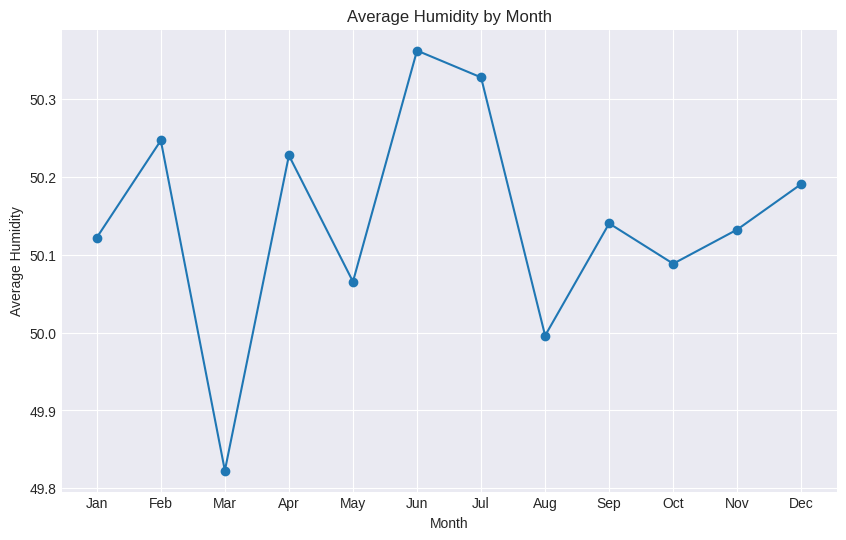

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('humidity_dataset.csv', parse_dates=['timestamp'])

# Convert the timestamp column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract month from the timestamp
data['month'] = data['timestamp'].dt.month

# Group by month and calculate the mean humidity
monthly_humidity = data.groupby('month')['humidity'].mean()

# Plot humidity by month
plt.figure(figsize=(10, 6))
monthly_humidity.plot(marker='o', linestyle='-')
plt.title('Average Humidity by Month')
plt.xlabel('Month')
plt.ylabel('Average Humidity')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


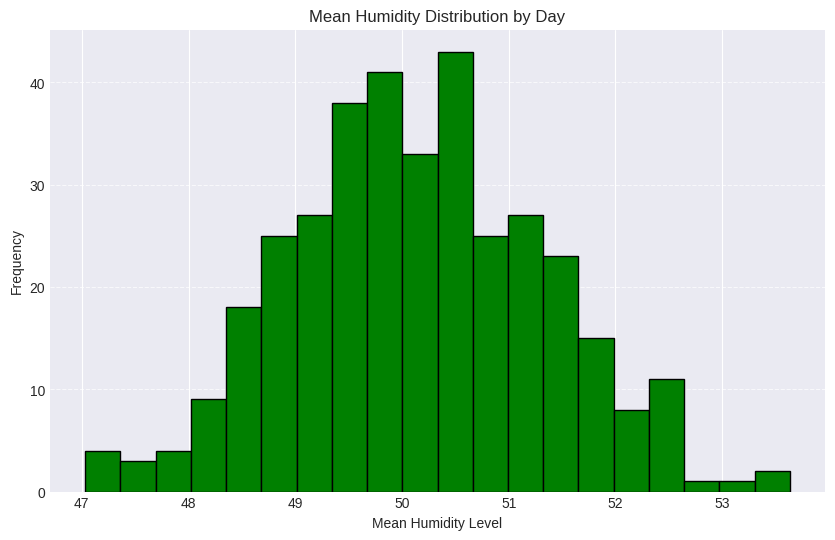

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('humidity_dataset.csv', parse_dates=['timestamp'])

# Convert the timestamp column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract date from the timestamp
data['date'] = data['timestamp'].dt.date

# Group data by date and calculate mean humidity for each day
daily_mean_humidity = data.groupby('date')['humidity'].mean()

# Plot histogram of mean humidity by day
plt.figure(figsize=(10, 6))
plt.hist(daily_mean_humidity, bins=20, color='green', edgecolor='black')
plt.title('Mean Humidity Distribution by Day')
plt.xlabel('Mean Humidity Level')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
